In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
%matplotlib inline

C:\Users\Daria\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv('email.csv').dropna(subset= ['content'])

C:\Users\Daria\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['tokens'] = df.one_line.apply(lambda x: str(x).split(" "))

In [4]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [5]:
from gensim.test.utils import get_tmpfile

In [6]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(df.tokens))]

In [7]:
max_epochs = 30
vec_size = 5
alpha = 0.025

model_doc2vec = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm = 1)
  
model_doc2vec.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model_doc2vec.train(documents,
                total_examples=model_doc2vec.corpus_count,
                epochs=model_doc2vec.iter)
    # decrease the learning rate
    model_doc2vec.alpha -= 0.0002
    # fix the learning rate, no decay
    model_doc2vec.min_alpha = model_doc2vec.alpha

model_doc2vec.save("d2v-5-2.model")
print("Model Saved")



iteration 0


C:\Users\Daria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
Model Saved


In [8]:
model_doc2vec.most_similar(positive =[ model_doc2vec.infer_vector(df.tokens[61])], topn= 2)

C:\Users\Daria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Oubrea', 0.9993441104888916), ('dklinger', 0.9989745616912842)]

In [9]:
model_doc2vec.docvecs[0]

array([ 3.7781713, -2.6998498,  0.7545288, -1.9208128, -3.4243102],
      dtype=float32)

In [10]:
X_docs = np.array([model_doc2vec.docvecs[i] for i in range(len(df))])

In [11]:
X_docs.shape

(235554, 5)

In [12]:
pca_docs = PCA(n_components=2)
result_docs = pca_docs.fit_transform(X_docs)

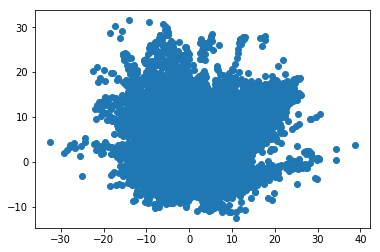

In [13]:
plt.scatter(result_docs[:,0], result_docs[:,1])

In [14]:
from sklearn.mixture import GaussianMixture

In [15]:
gmm = GaussianMixture(
        n_components=100, covariance_type='full')

In [16]:
gmm.fit(X_docs)

C:\Users\Daria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=100, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
y = gmm.predict(X_docs)

In [18]:
from matplotlib.pyplot import cm

In [19]:
color=iter(cm.rainbow(np.linspace(0,1,100)))

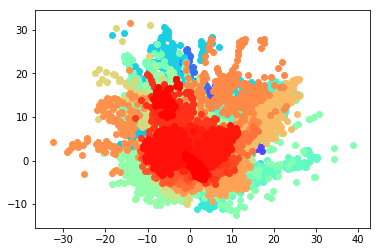

In [20]:
for i in range(100):
    c = next(color)
    plt.scatter(result_docs[y == i][:,0], result_docs[y == i][:,1], color=c)